<a href="https://colab.research.google.com/github/qraxiss/learning-data-science/blob/main/machine-learning/classification/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data & Libs

In [70]:
# Libs
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Data
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/learning-data-science-main/machine-learning/datas/diabetes.csv")
df = df.dropna()
df.index = np.arange(df.shape[0])

# X&y
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

# Test Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=31)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Model

In [65]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

# Predict

In [66]:
print("Basic Accuracy Score",accuracy_score(y_test, knn_model.predict(X_test)))
print("CV Accuracy Score",cross_val_score(knn_model,
                                          X_test, 
                                          y_test, 
                                          cv=10).mean())

Basic Accuracy Score 0.7402597402597403
CV Accuracy Score 0.7139492753623189


In [68]:
# Yüzdesel Oranlar
y_probs = pd.DataFrame(knn_model.predict_proba(X_test))
y_pred = [1 if i > 0.60 else 0 for i in list(y_probs[1])]

print("Basic Accuracy Score",accuracy_score(y_test, y_pred))

Basic Accuracy Score 0.683982683982684


# Model Tuning

In [ ]:
knn_params = {"n_neighbors": np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

In [73]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))
params = pd.Series(knn_cv.best_params_)

En iyi skor:0.7598881900768693
En iyi parametreler: {'n_neighbors': 15}


## Tuned Model

In [79]:
knn = KNeighborsClassifier(params[0])
knn_tuned = knn.fit(X_train, y_train)

In [80]:
print("Basic Accuracy Score",accuracy_score(y_test, knn_tuned.predict(X_test)))
print("CV Accuracy Score",cross_val_score(knn_tuned,
                                          X_test, 
                                          y_test, 
                                          cv=10).mean())

Basic Accuracy Score 0.7229437229437229
CV Accuracy Score 0.7355072463768116


# Plot

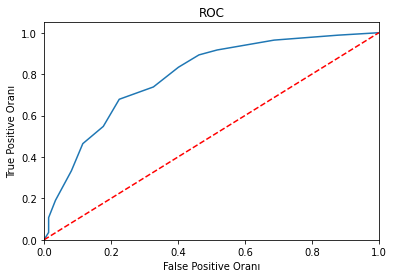

In [81]:
logit_roc_auc = roc_auc_score(y, knn_tuned.predict(X))

fpr, tpr, thresholds = roc_curve(y_test, knn_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()